# ANOVA Case Study 1: Sales Revenue
An electronics and home appliance chain suspect the location of shelves where television sets are kept will influence the sales revenue. The data on sales revenue in lakhs from the television sets when they are kept at different locations inside the store are given in sales revenue data file. The location is denoted as 1: front, 2: middle & 3: rear. Verify the doubt? The data is given in Sales_Revenue_Anova.csv.

* Factor: Location(A)
* Levels : front, middle, rear
* Response: Sales revenue

In [1]:
# Loading the relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Reading the Sales revenue data.
data = pd.read_csv('Sales_Revenue_Anova.csv')
data.head()

,Location,Sales_Revenue
0,1,1.55
1,1,2.36
2,1,1.84
3,1,1.72
4,2,4.23


In [3]:
data.groupby('Location')['Sales_Revenue'].count()

Location
1    4
2    8
3    6
Name: Sales_Revenue, dtype: int64

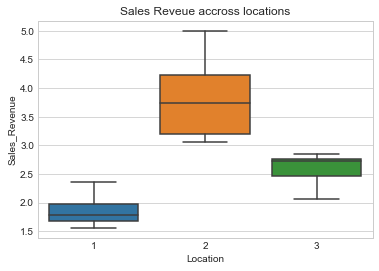

In [4]:
sns.boxplot(x = "Location", y = "Sales_Revenue", data = data)
plt.title('Sales Reveue accross locations')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean sales revenue from locations 1, 2 and 3 respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [5]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Sales_Revenue ~ Location', data = data).fit()
anova_table = sm.stats.anova_lm(mod, typ=2)
print(anova_table)

             sum_sq    df         F    PR(>F)
Location   0.474712   1.0  0.515171  0.483258
Residual  14.743449  16.0       NaN       NaN


### Step 5:  Decide to reject or fail to reject null hypothesis
In this example, p value is 0.483258 and it is greater than our chosen level of signifance at 5%

So the decision is: We fail to reject the null hypothesis at 5% level of significance.

### So there is no  sufficient evidence  to reject the null hypothesis that all locations are same in terms of sales revenue generation.